In [22]:
import requests
import pandas as pd

baseurl = "https://data.cityofchicago.org/resource/6zsd-86xi.json"

r = requests.get(baseurl)

print(r)

if r.status_code == 200:
    crime_data = r.json()

    crime_df = pd.DataFrame(crime_data)

    print(crime_df.head(2))
else:
    print("Failed to fetch data from the API.")

<Response [200]>
         id case_number                     date                 block  iucr  \
0  13431715    JH228235  2024-04-14T00:00:00.000      002XX E HURON ST  0281   
1  13429030    JH224976  2024-04-14T00:00:00.000  062XX S MICHIGAN AVE  0486   

              primary_type              description  \
0  CRIMINAL SEXUAL ASSAULT           NON-AGGRAVATED   
1                  BATTERY  DOMESTIC BATTERY SIMPLE   

          location_description  arrest  domestic  ... location_zip  \
0  HOSPITAL BUILDING / GROUNDS   False     False  ...                
1                    APARTMENT   False      True  ...                

  :@computed_region_awaf_s7ux :@computed_region_6mkv_f3dw  \
0                          22                       21182   
1                          53                       22260   

  :@computed_region_vrxf_vc4k :@computed_region_bdys_3d7i  \
0                          37                         158   
1                           7                         404  

In [23]:
crime_df.dtypes

id                             object
case_number                    object
date                           object
block                          object
iucr                           object
primary_type                   object
description                    object
location_description           object
arrest                           bool
domestic                         bool
beat                           object
district                       object
ward                           object
community_area                 object
fbi_code                       object
x_coordinate                   object
y_coordinate                   object
year                           object
updated_on                     object
latitude                       object
longitude                      object
location                       object
location_address               object
location_city                  object
location_state                 object
location_zip                   object
:@computed_r

In [24]:
import pandas as pd

# Converting the 'date' column to datetime format first
crime_df['date'] = pd.to_datetime(crime_df['date'])


In [25]:
crime_df.dropna(inplace=True)

In [26]:
crime_df.drop(columns=[":@computed_region_8hcu_yrd4", ":@computed_region_d3ds_rm58", ":@computed_region_d9mm_jgwp", ":@computed_region_rpca_8um6", ":@computed_region_43wa_7qmu", ":@computed_region_bdys_3d7i", ":@computed_region_vrxf_vc4k", ":@computed_region_6mkv_f3dw"], inplace=True)


In [27]:
selected_columns = [
    'id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description',
    'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward',
    'community_area', 'fbi_code', 'year',
    'updated_on', 'latitude', 'longitude', 'location_address',
    'location_city', 'location_state', 'location_zip'
]


new_crime_df = crime_df[selected_columns].copy()


data_types = {
    'id': 'int',
    'case_number': 'string',
    'date': 'datetime64[ns]', # Convert to datetime data type
    'block': 'string',
    'iucr': 'string',
    'primary_type': 'string',
    'description': 'string',
    'location_description': 'string',
    'arrest': 'bool',
    'domestic': 'bool',
    'beat': 'string',
    'district': 'string',
    'ward': 'object',
    'community_area': 'string',
    'fbi_code': 'object',
    'year': 'object',
    'updated_on': 'datetime64[ns]',  # Convert to datetime data type
    'latitude': 'float64',  # Convert to float data type
    'longitude': 'float64',
    'location_address': 'string',
    'location_city': 'string',
    'location_state': 'string',
    'location_zip': 'string'
}

new_crime_df= new_crime_df.astype(data_types)

# Display the data types of the new DataFrame
print(new_crime_df.dtypes)


id                               int64
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                    string[python]
primary_type            string[python]
description             string[python]
location_description    string[python]
arrest                            bool
domestic                          bool
beat                    string[python]
district                string[python]
ward                            object
community_area          string[python]
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location_address        string[python]
location_city           string[python]
location_state          string[python]
location_zip            string[python]
dtype: object


In [28]:
new_crime_df.drop(columns=['location_address', 'location_city', 'location_state', 'location_zip'], inplace=True)

In [29]:
new_crime_df.dtypes

id                               int64
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                    string[python]
primary_type            string[python]
description             string[python]
location_description    string[python]
arrest                            bool
domestic                          bool
beat                    string[python]
district                string[python]
ward                            object
community_area          string[python]
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
dtype: object

In [30]:
new_crime_df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude
0,13431715,JH228235,2024-04-14 00:00:00,002XX E HURON ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1834,018,2,8,02,2024,2024-04-21 15:40:50,41.895003,-87.621528
1,13429030,JH224976,2024-04-14 00:00:00,062XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,0311,003,20,40,08B,2024,2024-04-21 15:40:50,41.780946,-87.621995
2,13428596,JH224360,2024-04-14 00:00:00,023XX E 93RD ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,0413,004,7,48,02,2024,2024-04-21 15:40:50,41.726219,-87.567294
3,13428850,JH224732,2024-04-14 00:00:00,017XX E 86TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,0412,004,8,45,07,2024,2024-04-21 15:40:50,41.737879,-87.581669
4,13428796,JH224490,2024-04-14 00:00:00,0000X W 111TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,0522,005,9,49,06,2024,2024-04-21 15:40:50,41.692566,-87.624705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13427086,JH222603,2024-04-12 15:15:00,034XX N OSCEOLA AVE,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC GROUNDS,False,False,1631,016,38,17,08B,2024,2024-04-20 15:41:25,41.942249,-87.813008
996,13427210,JH222557,2024-04-12 15:15:00,001XX N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,0111,001,34,32,06,2024,2024-04-20 15:41:25,41.883500,-87.627877
997,13427119,JH222598,2024-04-12 15:14:00,002XX S HAMLIN BLVD,0810,THEFT,OVER $500,APARTMENT,False,False,1122,011,28,26,06,2024,2024-04-20 15:41:25,41.877756,-87.720642
998,13427383,JH222601,2024-04-12 15:14:00,008XX N CENTRAL AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,True,1511,015,29,25,04B,2024,2024-04-20 15:41:25,41.895080,-87.765400


In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
     'latitude', 'longitude','arrest', 'domestic'
] + categorical_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale numerical features
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Perform KMeans clustering
])

X = new_crime_df[features]

pipeline.fit(X)

cluster_labels = pipeline.named_steps['kmeans'].labels_

new_crime_df['cluster'] = cluster_labels

cluster_explanation = {
    0: "High Crime Rate Areas with frequent arrests and domestic incidents in public locations.",
    1: "Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.",
    2: "Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts."
}

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


In [32]:
cluster_counts = new_crime_df['cluster'].value_counts()
print(cluster_counts)

cluster
2    468
1    299
0    220
Name: count, dtype: int64


In [33]:
file_path = 'final_dataframe_with_labels.csv'

# Convert the dataframe to CSV
new_crime_df.to_csv(file_path, index=False)

print("CSV file saved successfully at:", file_path)


CSV file saved successfully at: final_dataframe_with_labels.csv


Now our labels are :
- Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
- Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
- Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.

## Now applying SVM to out labeled data (labels created using clustering).

1) Data Preperation:

In [34]:
from sklearn.preprocessing import LabelEncoder

# Filling missing values in 'arrest' and 'domestic' columns with False
new_crime_df['arrest'] = new_crime_df['arrest'].fillna(False)
new_crime_df['domestic'] = new_crime_df['domestic'].fillna(False)

# Converting 'arrest' and 'domestic' columns to boolean
new_crime_df['arrest'] = new_crime_df['arrest'].astype(bool)
new_crime_df['domestic'] = new_crime_df['domestic'].astype(bool)

# Encoding the data
label_encoder = LabelEncoder()

string_columns = ['case_number', 'block', 'iucr', 'primary_type', 'description',
                  'location_description', 'beat', 'district', 'ward',
                  'community_area', 'fbi_code', 'year']

for col in string_columns:
    new_crime_df[col] = label_encoder.fit_transform(new_crime_df[col])

In [35]:
# Define preprocessing steps for numerical and categorical columns
numeric_features = ['latitude', 'longitude']
numeric_transformer = StandardScaler()

categorical_features = ['case_number', 'block', 'iucr', 'primary_type', 'description',
                        'location_description', 'beat', 'district', 'ward',
                        'community_area', 'fbi_code', 'year']
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [50]:
new_crime_df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude,cluster
0,13431715,947,2024-04-14 00:00:00,63,1,4,53,28,False,False,202,16,11,72,1,0,2024-04-21 15:40:50,41.895003,-87.621528,2
1,13429030,833,2024-04-14 00:00:00,696,19,1,33,3,False,True,25,2,12,32,9,0,2024-04-21 15:40:50,41.780946,-87.621995,1
2,13428596,741,2024-04-14 00:00:00,357,1,4,53,28,False,False,38,3,47,39,1,0,2024-04-21 15:40:50,41.726219,-87.567294,2
3,13428850,802,2024-04-14 00:00:00,297,42,11,23,49,False,False,37,3,48,37,7,0,2024-04-21 15:40:50,41.737879,-87.581669,2
4,13428796,760,2024-04-14 00:00:00,23,37,20,0,36,False,False,50,4,49,40,6,0,2024-04-21 15:40:50,41.692566,-87.624705,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13427086,28,2024-04-12 15:15:00,449,15,1,74,45,False,False,180,14,31,7,9,0,2024-04-20 15:41:25,41.942249,-87.813008,2
996,13427210,13,2024-04-12 15:15:00,44,38,20,73,19,True,False,0,0,27,23,6,0,2024-04-20 15:41:25,41.883500,-87.627877,0
997,13427119,26,2024-04-12 15:14:00,73,36,20,58,3,False,False,129,10,20,16,6,0,2024-04-20 15:41:25,41.877756,-87.720642,0
998,13427383,27,2024-04-12 15:14:00,156,12,1,7,49,False,True,164,13,21,15,4,0,2024-04-20 15:41:25,41.895080,-87.765400,1


2) Splitting data into training and testing sets:

In [59]:
from sklearn.model_selection import train_test_split

# Spliting data into features (X) and target (y)
X = new_crime_df.drop(columns=['cluster', 'date', 'updated_on'])  # Assuming 'cluster' is the target variable
y = new_crime_df['cluster']

# Split data into Training and Testing sets without resampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
767,13427352,134,30,38,20,73,47,False,False,198,16,11,72,6,0,41.901873,-87.629199
726,13427475,168,48,64,21,86,49,True,False,132,10,19,18,13,0,41.879649,-87.686393
49,13428577,693,177,3,17,18,11,False,False,124,10,30,13,2,0,41.898176,-87.726170
728,13427773,353,386,37,20,0,49,False,False,103,8,6,50,6,0,41.810208,-87.687789
375,13428084,474,363,58,5,81,26,True,False,145,11,19,18,19,0,41.881183,-87.684982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,13431788,951,28,86,10,50,7,True,False,198,16,11,72,17,0,41.903932,-87.629309
271,13428682,740,765,56,3,82,3,False,False,31,2,46,62,12,0,41.759750,-87.610285
871,13427222,56,7,64,21,86,49,True,False,202,16,36,72,13,0,41.894079,-87.627797
440,13428271,371,229,58,5,81,26,False,False,8,0,27,24,19,0,41.866811,-87.625817


In [22]:
X_test

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
311,13430167,858,754,33,2,39,3,False,False,35,2,47,35,5,0,41.763076,-87.559643
139,13428438,736,804,24,0,3,49,False,False,62,5,8,36,3,0,41.748380,-87.631817
506,13430830,929,768,42,11,23,49,False,False,63,5,46,62,7,0,41.758125,-87.605377
865,13427265,108,83,37,20,0,25,False,False,202,16,11,72,6,0,41.894230,-87.618962
88,13434375,984,107,15,1,74,3,False,False,3,0,36,23,9,0,41.886945,-87.615529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,13428152,599,5,15,1,74,29,False,False,201,16,36,72,9,0,41.898333,-87.627508
637,13428868,811,295,43,11,32,46,False,False,240,20,34,71,7,0,41.995645,-87.670626
463,13428082,384,560,38,20,73,26,True,False,223,18,41,31,6,0,41.968891,-87.688914
544,13427834,336,95,15,1,74,40,False,False,2,0,33,23,9,0,41.877726,-87.628737


In [23]:
y_train.head(15)

767    1
726    2
49     0
728    2
375    1
546    1
354    1
903    1
537    2
335    1
994    1
238    0
864    1
33     1
31     1
Name: cluster, dtype: int32

In [24]:
y_test.head(15)

311    1
139    2
506    2
865    1
88     1
403    1
917    2
107    1
59     2
542    1
169    0
136    2
70     2
96     1
661    1
Name: cluster, dtype: int32

3) Applying SVM:

In [40]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X = new_crime_df.drop(columns=['cluster', 'date', 'updated_on'])  # Assuming 'cluster' is the target variable
y = new_crime_df['cluster']

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Initializing and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predicting on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluating the Decision Tree classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(conf_matrix_dt)
print("Decision Tree Accuracy:", accuracy_dt)

[[ 95   0   1]
 [  0  76   3]
 [  0   3 103]]
Decision Tree Accuracy: 0.9750889679715302


## SVM:


In [42]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

1) Linear Kernel:

Accuracy: 0.42704626334519574
Confusion Matrix:
[[ 20   0  76]
 [  5   0  74]
 [  6   0 100]]


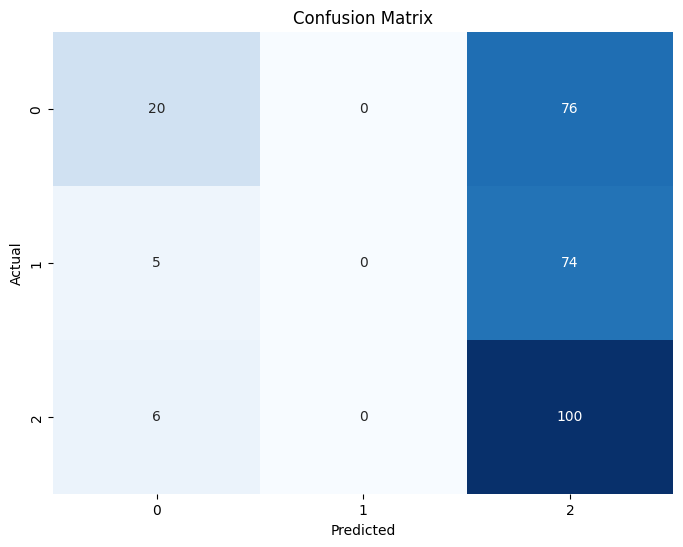

In [47]:
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

svm_model = SVC(kernel='linear', C=0.1)  # Ensure multiclass classification
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.42704626334519574
Confusion Matrix:
[[ 20   0  76]
 [  5   0  74]
 [  6   0 100]]


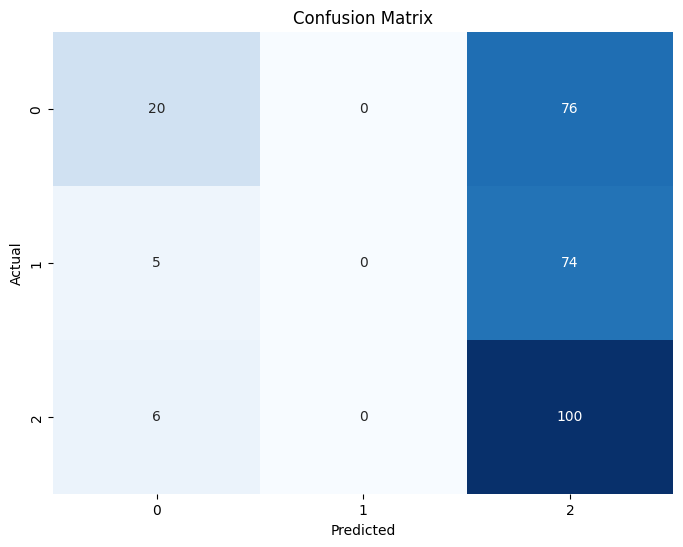

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform undersampling on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Check if all classes are present after undersampling
if len(np.unique(y_train_resampled)) < len(np.unique(y_train)):
    print("Error: Undersampling resulted in missing classes.")
else:
    # Train SVM model on the resampled data
    svm_model = SVC(kernel='linear', C=1)  # Ensure multiclass classification
    svm_model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


2) rbf Kernel:

Accuracy: 0.33807829181494664
Confusion Matrix:
[[18 78  0]
 [ 4 75  0]
 [ 5 99  2]]


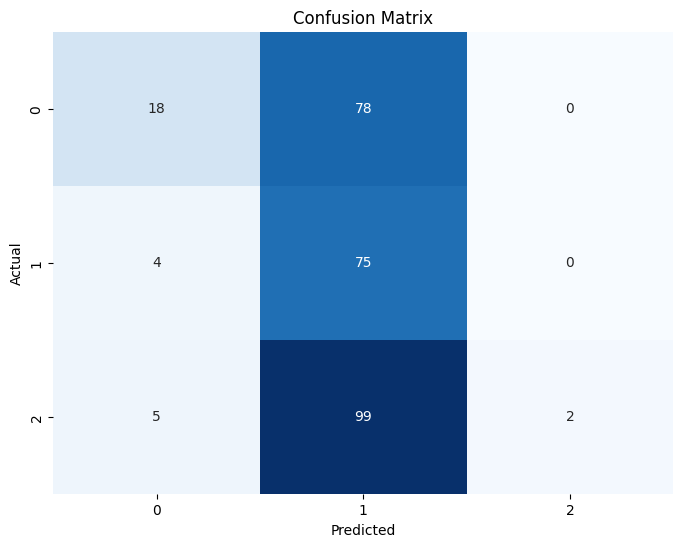

In [51]:
# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train SVM model on the resampled data
svm_model = SVC(kernel='rbf', C=1, decision_function_shape='ovr')  # Ensure multiclass classification
svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.33807829181494664
Confusion Matrix:
[[18 78  0]
 [ 4 75  0]
 [ 5 99  2]]


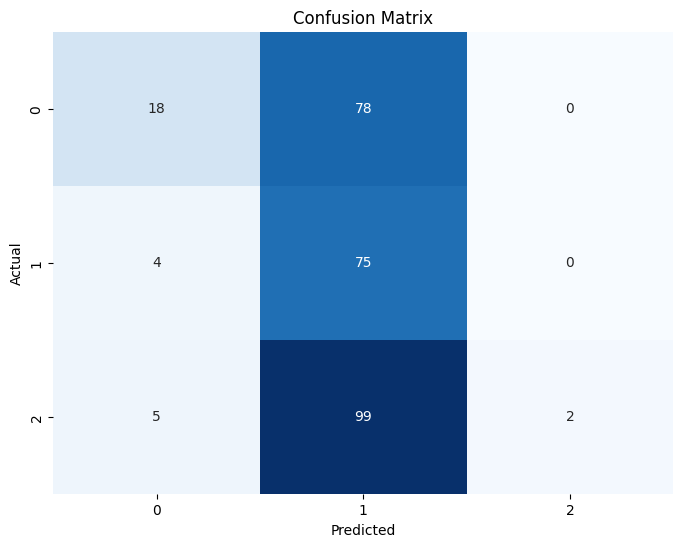

In [44]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train SVM model on the resampled data
svm_model = SVC(kernel='rbf', C=100, decision_function_shape='ovr')  # Ensure multiclass classification
svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


3) poly kernel:

Accuracy: 0.33451957295373663
Confusion Matrix:
[[18 78  0]
 [ 5 74  0]
 [ 5 99  2]]


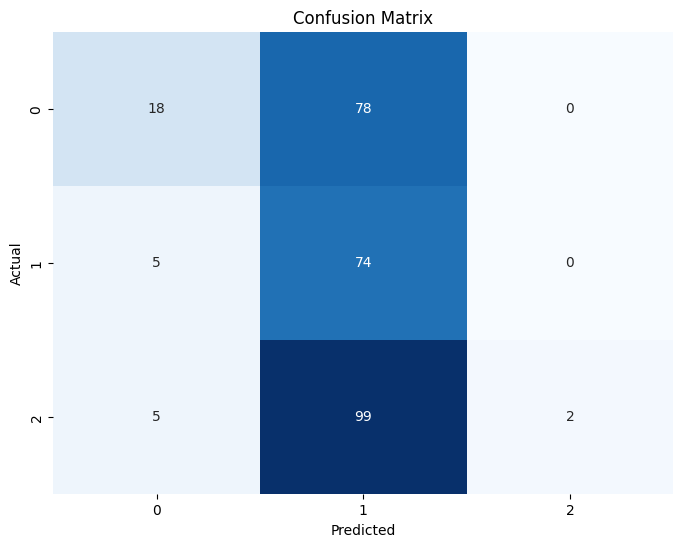

In [45]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train SVM model on the resampled data
svm_model = SVC(kernel='poly', C=0.1, decision_function_shape='ovr')  # Ensure multiclass classification
svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.33451957295373663
Confusion Matrix:
[[18 78  0]
 [ 5 74  0]
 [ 5 99  2]]


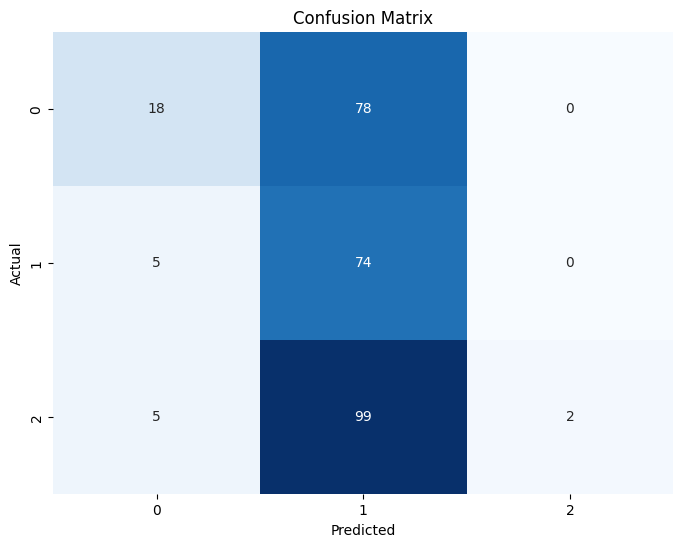

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling on the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train SVM model on the resampled data
svm_model = SVC(kernel='poly', C=10, decision_function_shape='ovr')  # Ensure multiclass classification
svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Visualization of SVM results to comare different kerners and c values

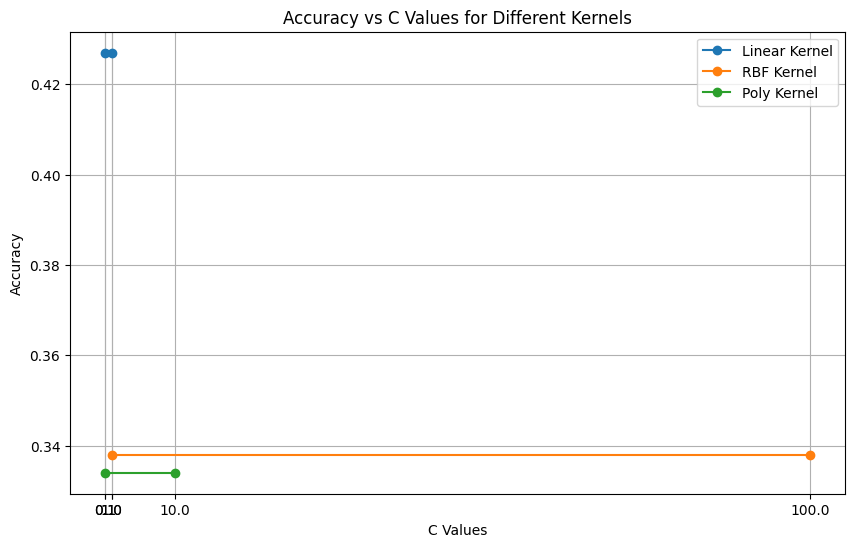

In [52]:
import matplotlib.pyplot as plt

# Accuracy values for different kernels and C values
accuracy_linear = [0.427, 0.427]
accuracy_rbf = [0.338, 0.338]
accuracy_poly = [0.334, 0.334]

# C values
C_values_linear = [0.1, 1]
C_values_rbf = [1, 100]
C_values_poly = [0.1, 10]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(C_values_linear, accuracy_linear, marker='o', label='Linear Kernel')
plt.plot(C_values_rbf, accuracy_rbf, marker='o', label='RBF Kernel')
plt.plot(C_values_poly, accuracy_poly, marker='o', label='Poly Kernel')

plt.title('Accuracy vs C Values for Different Kernels')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xticks(C_values_linear + C_values_rbf + C_values_poly)
plt.legend()
plt.grid(True)
plt.show()



Upon examining the comparison plot, it becomes apparent that the SVM models with different kernels (Linear, RBF, and Polynomial) yield varying levels of accuracy. Notably, the linear kernel consistently outperforms the RBF and polynomial kernels across different values of the regularization parameter C. This suggests that the dataset may exhibit inherent separability along linear boundaries, which the linear SVM model effectively exploits.

Interestingly, the accuracy remains constant across different values of C for each kernel. This phenomenon could stem from the dataset's intrinsic characteristics. When data is perfectly linearly separable, SVM models may achieve optimal performance regardless of the penalty parameter C. This implies that the models can establish maximum margin separation between classes, irrespective of the regularization strength.




Labels are :
- Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
- Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
- Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts."

Conclusion:
The comparison of SVM models with different kernels and cost values revealed a notable discrepancy in performance compared to decision tree and naive Bayes classifiers. Despite the efforts to optimize SVM's performance by exploring various kernels and cost values, significant misclassification persisted across all models. This observed disparity in performance can be attributed to the dataset's size and class imbalance.

The dataset, characterized by 1000 rows and featuring labels representing varying crime rates in different areas, presented challenges for SVM classification. The suboptimal performance of SVM models may stem from the dataset's size surpassing its capacity for effective processing, compounded by significant class imbalances. Particularly, the occurrence of frequent misclassifications indicates the difficulty SVM faces in accurately capturing minority classes, leading to consistently subpar performance across different values of the regularization parameter C.

While the linear kernel emerged as the preferred choice among SVM models, exhibiting potential for linear separability in the dataset, the persisting misclassification underscores the dataset's complexity. Even within the linear kernel, the presence of misclassification suggests that the dataset's separability may not be purely linear. Consequently, the preference for the linear kernel, coupled with the prevalence of misclassification, underscores the intricate interplay between dataset characteristics, such as size and class distribution, and model performance.

Furthermore, decision tree and naive Bayes classifiers demonstrated superior performance compared to SVM models. Decision trees are particularly well-suited for categorical data and handle collinearity better than SVMs, which might explain their superior performance in this scenario. Additionally, SVM's susceptibility to outliers may have further contributed to its suboptimal performance.

In spite of utilizing resampling techniques to address class imbalance, SVM models consistently exhibited poor performance. This outcome underscores the complexity of the dataset and suggests that factors beyond class distribution, such as feature relevance and dataset size, may have influenced SVM's effectiveness in classification.

In summary, while SVM's performance was suboptimal relative to decision tree and naive Bayes classifiers, the exploration of different kernels and cost values provided valuable insights into the dataset's characteristics. The observed challenges highlight the importance of considering dataset complexity and class distribution when selecting classification models, emphasizing the need for further exploration and refinement in model selection and feature engineering to enhance classification performance.